In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Life=pd.read_csv('Life Expectancy Data.csv')
Life.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
Life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
Life.columns = Life.columns.str.strip()

In [5]:
Life['Life expectancy'].fillna(Life['Life expectancy'].mode()[0], inplace=True)
Life['Adult Mortality'].fillna(Life['Adult Mortality'].mode()[0], inplace=True)

Life['Alcohol'].fillna((Life['Alcohol'].mean()), inplace=True)
Life['Hepatitis B'].fillna((Life['Hepatitis B'].mean()), inplace=True)
Life['BMI'].fillna((Life['BMI'].mean()), inplace=True)
Life['Polio'].fillna((Life['Polio'].mean()), inplace=True)
Life['Total expenditure'].fillna((Life['Total expenditure'].mean()), inplace=True)
Life['Diphtheria'].fillna((Life['Diphtheria'].mean()), inplace=True)
Life['GDP'].fillna((Life['GDP'].mean()), inplace=True)
Life['Population'].fillna((Life['Population'].mean()), inplace=True)
Life['thinness  1-19 years'].fillna((Life['thinness  1-19 years'].mean()), inplace=True)
Life['thinness 5-9 years'].fillna((Life['thinness 5-9 years'].mean()), inplace=True)
Life['Income composition of resources'].fillna((Life['Income composition of resources'].mean()), inplace=True)
Life['Schooling'].fillna((Life['Schooling'].mean()), inplace=True)

In [6]:
Life.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
Life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
Life.drop(['Country'],axis=1,inplace=True)
Life.drop(['Year'],axis=1,inplace=True)

In [9]:
Life['Status']=np.where(Life['Status'].str.contains('Developing'),0,1)

In [10]:
Life.dtypes

Status                               int32
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [11]:
X=Life.drop('Life expectancy',axis=1)
y=Life['Life expectancy']

In [12]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.corr()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,1.000000,-0.314205,-0.113683,0.581584,0.436816,0.094095,-0.070314,0.312232,-0.116378,0.224836,0.281176,0.223210,-0.148974,0.428842,-0.036496,-0.371523,-0.371906,0.456545,0.494892
Adult Mortality,-0.314205,1.000000,0.094740,-0.185417,-0.241343,-0.138872,0.028601,-0.389289,0.108751,-0.278291,-0.102185,-0.272808,0.524277,-0.271439,-0.011752,0.320611,0.336643,-0.447218,-0.442080
infant deaths,-0.113683,0.094740,1.000000,-0.111802,-0.084877,-0.155278,0.500991,-0.228523,0.996218,-0.192821,-0.123462,-0.189601,0.028083,-0.105257,0.481654,0.450975,0.463507,-0.159593,-0.203670
Alcohol,0.581584,-0.185417,-0.111802,1.000000,0.321544,0.079539,-0.041420,0.319077,-0.108147,0.213472,0.287723,0.214346,-0.046299,0.300155,-0.023195,-0.419813,-0.407510,0.419515,0.493595
percentage expenditure,0.436816,-0.241343,-0.084877,0.321544,1.000000,0.014716,-0.049701,0.226550,-0.086864,0.136320,0.178163,0.138662,-0.095782,0.885050,-0.021156,-0.243982,-0.246729,0.372030,0.383521
Hepatitis B,0.094095,-0.138872,-0.155278,0.079539,0.014716,1.000000,-0.074552,0.127745,-0.161048,0.412194,0.056278,0.499536,-0.100021,0.068972,-0.082950,-0.098273,-0.105547,0.146975,0.162198
Measles,-0.070314,0.028601,0.500991,-0.041420,-0.049701,-0.074552,1.000000,-0.167009,0.511579,-0.147567,-0.101751,-0.148373,0.027986,-0.059079,0.222869,0.223676,0.222387,-0.125207,-0.119732
BMI,0.312232,-0.389289,-0.228523,0.319077,0.226550,0.127745,-0.167009,1.000000,-0.238429,0.275330,0.219392,0.279494,-0.242108,0.271308,-0.052584,-0.536269,-0.545392,0.477126,0.515383
under-five deaths,-0.116378,0.108751,0.996218,-0.108147,-0.086864,-0.161048,0.511579,-0.238429,1.000000,-0.210437,-0.125400,-0.209337,0.040490,-0.108547,0.464408,0.451965,0.463974,-0.178013,-0.218810
Polio,0.224836,-0.278291,-0.192821,0.213472,0.136320,0.412194,-0.147567,0.275330,-0.210437,1.000000,0.126694,0.677566,-0.143018,0.183620,-0.033559,-0.219842,-0.225187,0.348802,0.379885


<AxesSubplot:>

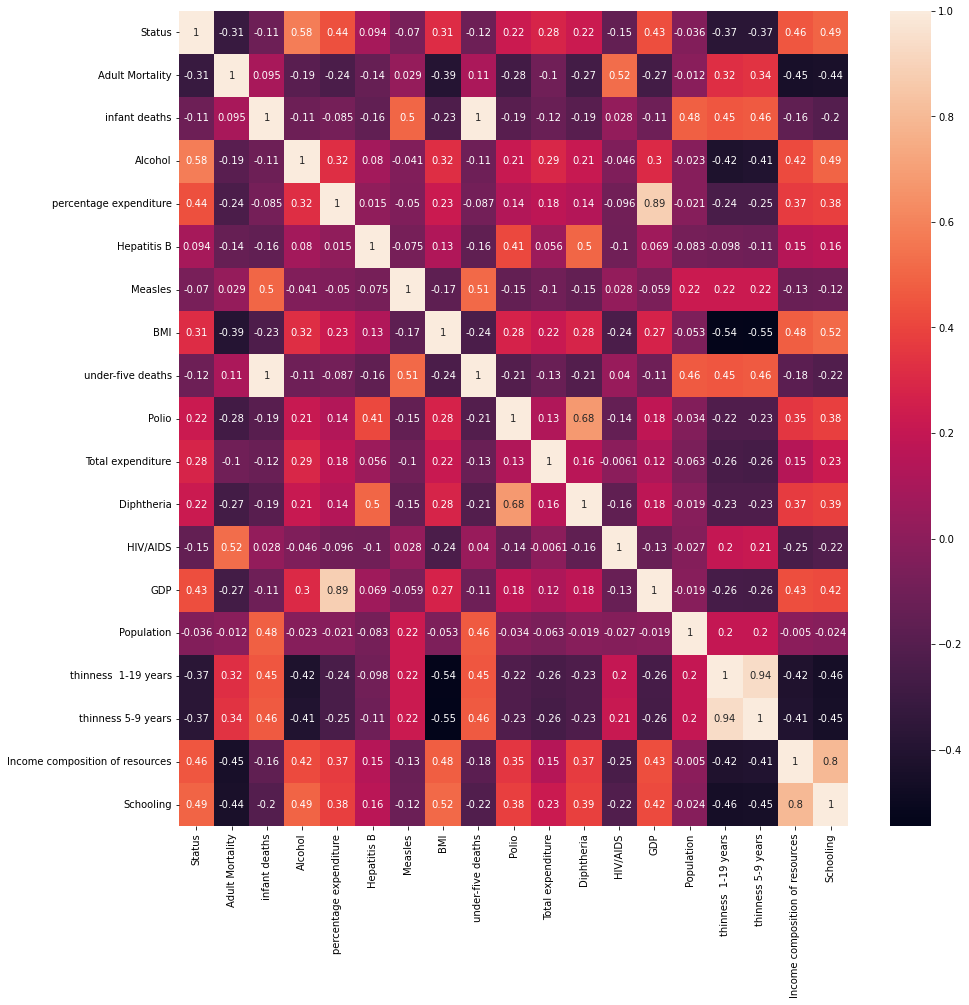

In [15]:
plt.figure(figsize=(15,15))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [16]:
def corrll(dataset,thresold):
    corr_set=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thresold:
                colname=corr_matrix.columns[i]
                corr_set.add(colname)
    return corr_set

In [17]:
corr_features=corrll(X_train,0.85)

In [18]:
corr_features

{'GDP', 'thinness 5-9 years', 'under-five deaths'}

In [19]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [20]:
X_train.shape,X_test.shape

((2203, 16), (735, 16))

In [21]:
X_train.columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'Population',
       'thinness  1-19 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

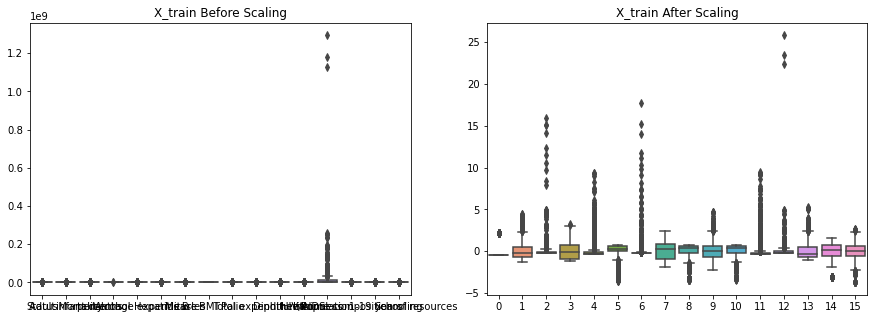

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Regression

Mean absolute error 3.036465697172225
R2 Score 0.8058823387521706


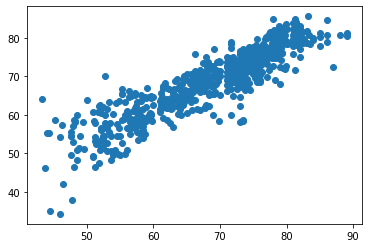

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean absolute error 3.293686941563255
R2 Score 0.767207027190946


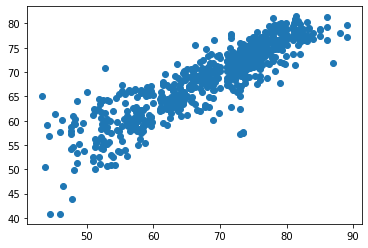

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Ridge Regression

Mean absolute error 3.036389775929349
R2 Score 0.8058921942030269


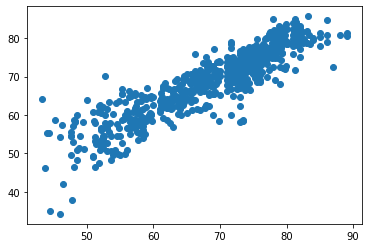

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Lasso cv

In [27]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 3.035740064151507
R2 Score 0.8057500823034347


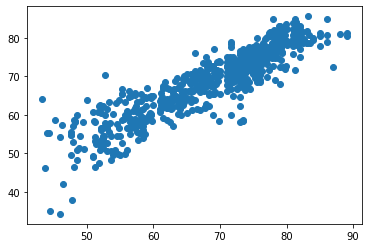

In [28]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [29]:
Ridge

sklearn.linear_model._ridge.Ridge

Mean absolute error 3.0357138577861122
R2 Score 0.8059773029796968


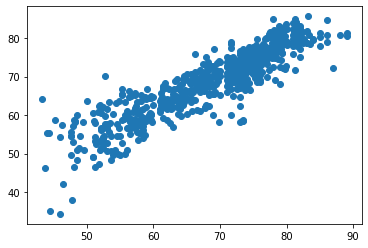

In [30]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [33]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))